In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymysql
import pandas as pd
conn = pymysql.connect( # mysql ai db server connection
    user='my_srv',              # 유저 이름
    passwd='wkrldi@duqhdi12',   # 패스워드
    host='125.141.223.156',     # 호스트
    db='m_yeoboya_ai_dv',             # 데이터베이스
    charset='utf8',             # 인코딩
    port=33141                  # 포트 번호(''없이 사용)
)

In [3]:
# member_basic
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_basic" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
basic_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
basic_df.head(3)

,mem_no,mem_id,mem_passwd,mem_passwd_v1,mem_passwd_v2,passwd_tmp_yn,mem_nick,mem_nick_yn,mem_sex,mem_birth_year,...,mate_reg_yn,mem_slct,matchmk_mem_no,matchmk_conts,smtp_slct,smtp_id,app_ver,phone_ver,mem_chnl,upd_date
0,2,ag315@gmail.com,*EE8B70CCF4C155606422917955B852444BB120A9,d8f93948f3d3c283102c19e6db44356451b9985540178e...,,n,디노킹,y,m,1971,...,y,b,0,,b,BD31B3FA-7EE3-4739-A2BB-23B3D1A8BDC3,6.6.103,15.4.1,501,2015-07-22 16:21:21
1,5,dntn20@naver.com,*9CC98632AA58449C1C67E7A30BDC3647BFAA6293,f8dc94048d37ead74a70a0a94bdbc9e3fcdec63258c5c9...,,n,바쉐린,n,m,1977,...,y,b,0,,a,c16a8b0029801ff1,1.5.318,10,501,2015-07-22 16:25:49
2,57,baroom@naver.com,*BE52216085D67EE7619B0D23D61C04D14FBA8922,7c07727cb559b31f69ee693a92e4eeada400f13bc370cd...,,n,허니버터,y,m,1977,...,y,b,0,,a,b59e1c528cfb2268,1.5.311,12,501,2015-07-27 09:03:18


In [4]:
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_mate" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
mate_df = pd.DataFrame(result) # 데이터 프레임으로 변환환
mate_df.head(3)

,mem_no,mem_sex,mem_loc,mem_l_code,mem_birth_year,mem_birth_month,mem_birth_ddi,mate_slct,mate_slct_yn,mem_name_slct,...,family_conts_upd_cnt,secret_item_yn,secret_yn,respect_person_cont,my_point_cont,list_prt_yn,my_hd_item_yn,my_hd_yn,ins_date,upd_date
0,5,m,q,qnz,1977,1,9,w,y,y,...,13,y,y,,90,y,n,n,2015-07-22 16:31:35,2022-05-30 18:35:15
1,1804864,m,o,o10,1993,2,1,w,y,y,...,1,n,n,,80,y,n,n,2022-03-19 18:07:23,2022-06-06 19:12:05
2,2,m,e,e05,1971,1,3,r,y,y,...,2,n,n,,50,y,n,n,2015-07-22 16:37:25,2021-11-04 06:21:51


In [5]:
# member_msg_log_back
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_msg_log_back where ins_date between '2022-05-22' and '2022-05-28'" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
msg_df = pd.DataFrame(result) 
msg_df.head(3)

,auto_no,mem_no,mem_sex,mem_birth_year,mate_slct,login_media,mem_slct,ptr_mem_no,ptr_mem_sex,ptr_mem_birth_year,ptr_mate_slct,ptr_login_media,read_yn,msg_type,msg_slct,msg_cont,msg_etc,file_name,file_size,ins_date
0,202459354,1766800,m,1981,w,s,o,1852683,f,1979,w,s,n,1,0,서로 적극적으로 해야,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:00
1,202459356,1852617,m,1978,w,s,o,1852148,f,1974,r,,n,1,0,반갑습니다^^,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:01
2,202459358,509026,m,1987,w,s,n,1832078,f,1993,w,s,n,1,0,재밌겠어요 그죠,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:01


In [6]:
len(msg_df)

665602

In [7]:
msg_df.drop_duplicates(subset=['mem_no','ptr_mem_no'])

,auto_no,mem_no,mem_sex,mem_birth_year,mate_slct,login_media,mem_slct,ptr_mem_no,ptr_mem_sex,ptr_mem_birth_year,ptr_mate_slct,ptr_login_media,read_yn,msg_type,msg_slct,msg_cont,msg_etc,file_name,file_size,ins_date
0,202459354,1766800,m,1981,w,s,o,1852683,f,1979,w,s,n,1,0,서로 적극적으로 해야,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:00
1,202459356,1852617,m,1978,w,s,o,1852148,f,1974,r,,n,1,0,반갑습니다^^,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:01
2,202459358,509026,m,1987,w,s,n,1832078,f,1993,w,s,n,1,0,재밌겠어요 그죠,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:01
3,202459360,1130247,f,1980,r,s,o,1456138,m,1972,r,s,n,1,0,ㅋㅋ,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:01
4,202459362,1847097,m,1983,r,s,o,1829950,f,1978,r,s,n,1,0,소소하게 사는 ㅋ,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-22 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665586,203790248,1394726,m,1972,r,s,o,1845695,f,1977,r,s,n,1,0,방가워요. 세종에서 국책연구원으로 있는 이강수라고 합니다. 혹시 대화가능할까요,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-27 23:59:50
665590,203790256,1856788,m,1993,w,s,n,1747844,f,1990,w,s,n,1,0,안녕하세요!!,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-27 23:59:51
665591,203790258,1602195,m,1981,r,s,o,1747129,f,1987,w,s,n,1,0,안녕하세요 저는 나이는 42세이구요\n\n\n지금은 잠깐 경주에 있긴한데 원래 고향...,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-27 23:59:52
665592,203790260,1190413,m,1977,w,s,o,1840870,f,1980,w,s,n,1,0,안녕하세요.\n 저는 여행같은 드라이브ㆍ맛집탐방ㆍ 길거리 데이트 같이 다니는걸 좋아...,"{""mediaFileName"":"""",""mediaPlayTime"":"""",""mediaP...",,,2022-05-27 23:59:52


In [8]:
# 1개만 카운트하기 위해 중복 회원 쌍 제거, member_mate에 있는 회원만 사용
msg_df.drop_duplicates(inplace=True, subset=['mem_no','ptr_mem_no'])
msg_df = msg_df[msg_df['mem_no'].isin(mate_df['mem_no'].values)]
msg_df = msg_df[msg_df['ptr_mem_no'].isin(mate_df['mem_no'].values)]
msg_df.reset_index(drop=True,inplace=True)
len(msg_df)

146138

In [9]:
from tqdm import tqdm

In [10]:
# 긍정 응답 메시지 찾기
bi_temp = pd.DataFrame()
cnt = 0
temp = msg_df.copy()[['mem_no', 'ptr_mem_no']]
temp2 = temp.rename(columns={'mem_no' : 'ptr_mem_no', 'ptr_mem_no' : 'mem_no'})
for i in tqdm(range(len(temp))) :
    t = temp[(temp['mem_no']==temp2.loc[i, 'mem_no']) & (temp['ptr_mem_no']==temp2.loc[i, 'ptr_mem_no'])]
    if len(t) >= 1 :
        cnt += 1
        bi_temp = pd.concat([bi_temp, t])
        
print(cnt)
    
bi_temp.head()

100%|████████████████████████████████████████████████████████████████████████| 146138/146138 [02:13<00:00, 1095.28it/s]

35116


,mem_no,ptr_mem_no
51,1852683,1766800
33487,1852148,1852617
7,1456138,1130247
170,1829950,1847097
32,1852785,1670756


In [11]:
bi_temp['response_positive'] = 1

In [12]:
temp = temp.drop(bi_temp.index)
temp['response_positive'] = 0

In [13]:
pr = pd.concat([bi_temp, temp])
pr['response_positive'].value_counts()

0    111022
1     35116
Name: response_positive, dtype: int64

In [14]:
# member_msg_log_back
cursor = conn.cursor(pymysql.cursors.DictCursor)
sql = "select * from m_yeoboya.member_pf_view_all_log where ins_date between '2022-05-22' and '2022-05-28'" 
cursor.execute(sql)
result = cursor.fetchall()
cursor.close()
pf_view_df = pd.DataFrame(result) 
pf_view_df.head(3)

,auto_no,mem_no,mem_sex,ptr_mem_no,ptr_mem_sex,ptr_rprsn_photo_yn,open_slct,open_date,open_type,item_cnt,ins_date
0,329457069,1852521,m,1600821,f,n,v,2022-05-22 00:00:00,0,0,2022-05-22 00:00:00
1,329457070,1802892,m,1852768,f,n,v,2022-05-22 00:00:04,0,0,2022-05-22 00:00:04
2,329457071,1844756,m,1851181,f,n,v,2022-05-22 00:00:04,0,0,2022-05-22 00:00:04


In [15]:
len(pf_view_df)

1615298

In [16]:
# 1개만 카운트하기 위해 중복 회원 쌍 제거, member_mate에 있는 회원만 사용
pf_view_df.drop_duplicates(inplace=True, subset=['mem_no','ptr_mem_no'])
pf_view_df.reset_index(drop=True,inplace=True)
pf_view_df = pf_view_df[pf_view_df['mem_no'].isin(mate_df['mem_no'].values)]
pf_view_df = pf_view_df[pf_view_df['ptr_mem_no'].isin(mate_df['mem_no'].values)]
print(len(pf_view_df))

953029


In [17]:
from datetime import datetime
# age 연산
mate_df['age'] = int(str(datetime.today())[:4]) - mate_df['mem_birth_year']
df = mate_df[['mem_no','mem_sex','age']]
# df.head()

In [18]:
pf_view_df.reset_index(drop=True, inplace=True)
msg_df.reset_index(drop=True, inplace=True)

df.reset_index(drop=True, inplace=True)

In [19]:
# x가 열람한 회원 리스트
df['view_list'] = None
for i in tqdm(range(len(df))) :
    view_list = pf_view_df[pf_view_df['mem_no']==df.loc[i, 'mem_no']]['ptr_mem_no'].values.tolist()
    df.loc[i, 'view_list'] = [[view_list]]
# df.head(3)

100%|█████████████████████████████████████████████████████████████████████████| 124326/124326 [07:47<00:00, 265.97it/s]


In [20]:
df['view_list'] = df['view_list'].apply(lambda x : x[0])
df['view_count'] = df['view_list'].apply(lambda x : len(x)) # 총 열람 횟수

In [21]:
# x를 열람한 회원 리스트
df['viewed_list'] = None
for i in tqdm(range(len(df))) :
    viewed_list = pf_view_df[pf_view_df['ptr_mem_no']==df.loc[i, 'mem_no']]['mem_no'].values.tolist()
    df.loc[i, 'viewed_list'] = [[viewed_list]]

100%|█████████████████████████████████████████████████████████████████████████| 124326/124326 [08:32<00:00, 242.42it/s]


In [22]:
df['viewed_list'] = df['viewed_list'].apply(lambda x : x[0])
df['viewed_count'] = df['viewed_list'].apply(lambda x : len(x)) # 총 열람된 횟수

In [23]:
# 메시지 발신 회원 리스트
df['send_list'] = None
for i in tqdm(range(len(df))) :
    send_list = msg_df[msg_df['mem_no']==df.loc[i, 'mem_no']]['ptr_mem_no'].values.tolist()
    df.loc[i, 'send_list'] = [[send_list]]
# df.head()

100%|█████████████████████████████████████████████████████████████████████████| 124326/124326 [07:19<00:00, 283.15it/s]


In [24]:
# 메시지 수신 회원 리스트
df['sent_list'] = None
for i in tqdm(range(len(df))) :
    sent_list = msg_df[msg_df['ptr_mem_no']==df.loc[i, 'mem_no']]['mem_no'].values.tolist()
    df.loc[i, 'sent_list'] = [[sent_list]]
# df.head()

100%|█████████████████████████████████████████████████████████████████████████| 124326/124326 [06:29<00:00, 319.23it/s]


In [25]:
df['send_list'] = df['send_list'].apply(lambda x : x[0])
df['sent_list'] = df['sent_list'].apply(lambda x : x[0])

In [26]:
df['send_count'] = df['send_list'].apply(lambda x : len(x)) # 총 발신 수 
df['sent_count'] = df['sent_list'].apply(lambda x : len(x)) # 총 수신 수
df.head(3)

,mem_no,mem_sex,age,view_list,view_count,viewed_list,viewed_count,send_list,sent_list,send_count,sent_count
0,5,m,45,[741137],1,[],0,[],[],0,0
1,1804864,m,29,"[1771542, 1547500]",2,[],0,[],[],0,0
2,2,m,51,[],0,[],0,[],[],0,0


In [27]:
temp = pd.merge(df[['mem_no','mem_sex','age','view_count','viewed_count','send_count','sent_count']], basic_df[['mem_no','login_cnt', 'tot_stay_time']])
info = pd.merge(temp, mate_df[['mem_no','photo_cnt', 'upd_cnt']])
info.head()

,mem_no,mem_sex,age,view_count,viewed_count,send_count,sent_count,login_cnt,tot_stay_time,photo_cnt,upd_cnt
0,5,m,45,1,0,0,0,8335,4802952,0,142
1,1804864,m,29,2,0,0,0,59,2668,2,5
2,2,m,51,0,0,0,0,3477,960696,0,24
3,57,m,45,0,0,0,0,1083,4846589,0,39
4,211,m,56,33,4,0,0,32756,5786288,0,101


In [28]:
ptr_info = info.copy()
ptr_info.columns = ['ptr_' + i for i in ptr_info.columns]
ptr_info.head()

,ptr_mem_no,ptr_mem_sex,ptr_age,ptr_view_count,ptr_viewed_count,ptr_send_count,ptr_sent_count,ptr_login_cnt,ptr_tot_stay_time,ptr_photo_cnt,ptr_upd_cnt
0,5,m,45,1,0,0,0,8335,4802952,0,142
1,1804864,m,29,2,0,0,0,59,2668,2,5
2,2,m,51,0,0,0,0,3477,960696,0,24
3,57,m,45,0,0,0,0,1083,4846589,0,39
4,211,m,56,33,4,0,0,32756,5786288,0,101


In [29]:
temp = pd.merge(pr, info)
pr_df = pd.merge(temp, ptr_info)
pr_df.head()

,mem_no,ptr_mem_no,response_positive,mem_sex,age,view_count,viewed_count,send_count,sent_count,login_cnt,...,ptr_mem_sex,ptr_age,ptr_view_count,ptr_viewed_count,ptr_send_count,ptr_sent_count,ptr_login_cnt,ptr_tot_stay_time,ptr_photo_cnt,ptr_upd_cnt
0,1852683,1766800,1,f,43,128,1318,19,167,174,...,m,41,111,54,108,27,1609,230833,9,1
1,1733296,1766800,1,f,36,49,106,8,16,2968,...,m,41,111,54,108,27,1609,230833,9,1
2,946456,1766800,1,f,43,27,142,5,41,1110,...,m,41,111,54,108,27,1609,230833,9,1
3,1281325,1766800,1,f,39,23,66,12,22,1975,...,m,41,111,54,108,27,1609,230833,9,1
4,1852948,1766800,1,f,38,88,1830,26,172,138,...,m,41,111,54,108,27,1609,230833,9,1


In [30]:
pr_df_female = pr_df[pr_df['mem_sex']=='f']
pr_df_male = pr_df[pr_df['mem_sex']=='m']

In [31]:
pr_df_female.columns = [i.replace('ptr_','') if 'ptr_' in i or i == 'response_positive' else 'ptr_' + i for i in pr_df_female.columns]

In [32]:
pr_df = pd.concat([pr_df_male, pr_df_female])

In [33]:
pr_df = pr_df.drop(['mem_no','ptr_mem_no','mem_sex','ptr_mem_sex'], axis =1)
pr_df['age_gap'] = (pr_df['age'] - pr_df['ptr_age'])

In [34]:
X = pr_df.drop('response_positive', axis=1)
y = pr_df['response_positive']

In [35]:
y.value_counts()

0    111022
1     35116
Name: response_positive, dtype: int64

In [36]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=777, test_size=0.3)

In [37]:
model = CatBoostClassifier(random_state=77, silent=True )
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

In [38]:
from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

AUC Score : 0.930


In [39]:
f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

f1 score : 0.722


In [64]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# X_scaled = std_scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=777, test_size=0.3)


# model = CatBoostClassifier(random_state=77, silent=True )
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# pred_proba = model.predict_proba(X_test)


# from sklearn.metrics import auc, f1_score, roc_curve
# fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
# print(f'AUC Score : {auc(fpr,tpr):.3f}')


# f1_score(y_test, pred)
# print(f'f1 score : {f1_score(y_test, pred):.3f}')

# Over-Sampling Strategy

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_vis = pca.fit_transform(X)

## 1. SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=70)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape :', Counter(y_res))

Resampled dataset shape : Counter({1: 111022, 0: 111022})


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=777, test_size=0.3)

In [43]:
model = CatBoostClassifier(random_state=77, silent=True )
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

In [44]:
from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

AUC Score : 0.949


In [45]:
f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

f1 score : 0.887


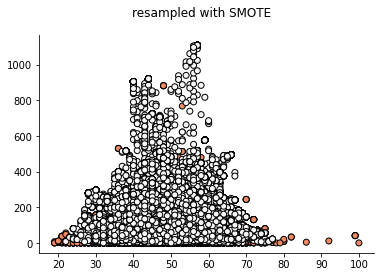

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
kwarg_params = {'linewidth' : 1, 'edgecolor' : 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle('resampled with SMOTE')
pass

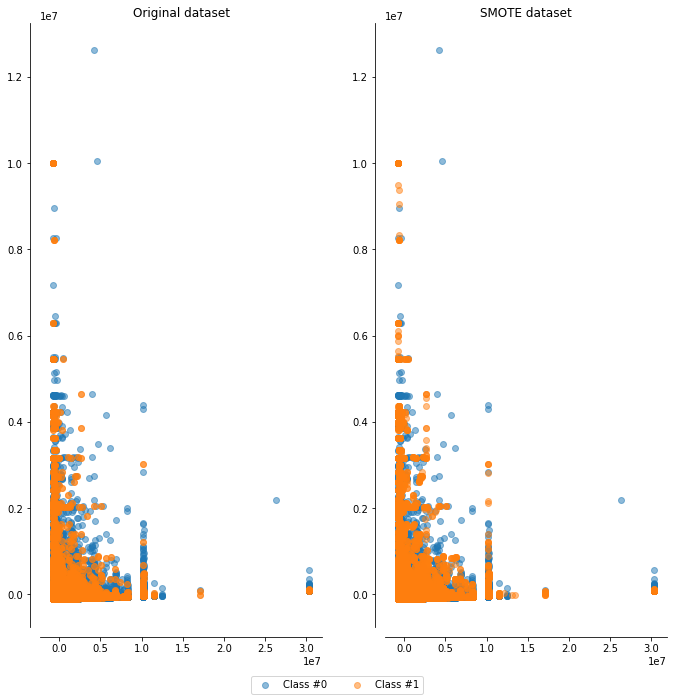

In [47]:
X_res_vis = pca.transform(X_res)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label='Class #0', alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label='Class #1', alpha=0.5)
ax1.set_title('Original dataset')


ax2.scatter(X_res_vis[y_res == 0, 0], X_res_vis[y_res == 0, 1], label='Class #0', alpha=0.5)
ax2.scatter(X_res_vis[y_res == 1, 0], X_res_vis[y_res == 1, 1], label='Class #1', alpha=0.5)
ax2.set_title('SMOTE dataset')

for ax in (ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))


plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
             ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)    
plt.show()

## 2. borderline-SMOTE

In [48]:
from imblearn.over_sampling import BorderlineSMOTE
borderline_smote = BorderlineSMOTE(random_state=70)
X_res, y_res = borderline_smote.fit_resample(X, y)
print('Resampled dataset shape :', Counter(y_res))

Resampled dataset shape : Counter({1: 111022, 0: 111022})


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=777, test_size=0.3)

In [50]:
model = CatBoostClassifier(random_state=77, silent=True )
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

In [51]:
from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

AUC Score : 0.948


In [52]:
f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

f1 score : 0.887


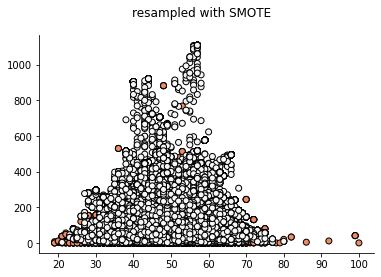

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
kwarg_params = {'linewidth' : 1, 'edgecolor' : 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle('resampled with borderline-SMOTE')
pass

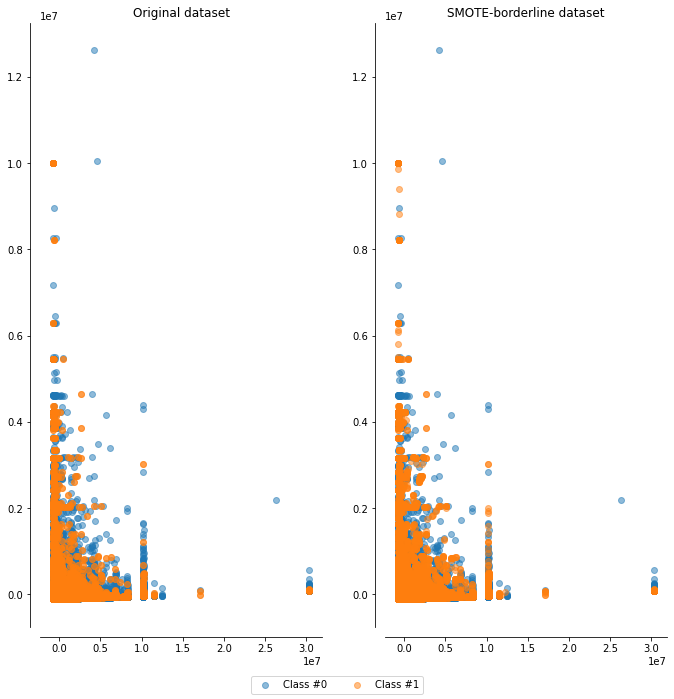

In [54]:
X_res_vis = pca.transform(X_res)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label='Class #0', alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label='Class #1', alpha=0.5)
ax1.set_title('Original dataset')


ax2.scatter(X_res_vis[y_res == 0, 0], X_res_vis[y_res == 0, 1], label='Class #0', alpha=0.5)
ax2.scatter(X_res_vis[y_res == 1, 0], X_res_vis[y_res == 1, 1], label='Class #1', alpha=0.5)
ax2.set_title('SMOTE-borderline dataset')

for ax in (ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))


plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
             ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)    
plt.show()

## 3. ADASYN

In [55]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=70)
X_res, y_res = adasyn.fit_resample(X, y)
print('Resampled dataset shape :', Counter(y_res))

Resampled dataset shape : Counter({1: 116616, 0: 111022})


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state=777, test_size=0.3)

In [57]:
model = CatBoostClassifier(random_state=77, silent=True )
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

In [58]:
from sklearn.metrics import auc, f1_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test, pred_proba[:, 1])
print(f'AUC Score : {auc(fpr,tpr):.3f}')

AUC Score : 0.948


In [59]:
f1_score(y_test, pred)
print(f'f1 score : {f1_score(y_test, pred):.3f}')

f1 score : 0.891


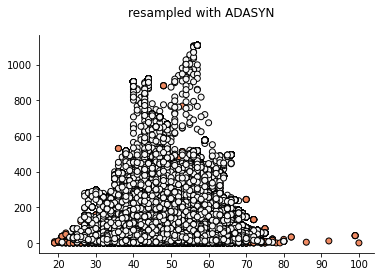

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
kwarg_params = {'linewidth' : 1, 'edgecolor' : 'black'}
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_res]
plt.scatter(X_res.iloc[:, 0], X_res.iloc[:, 1], c=colors, **kwarg_params)
sns.despine()
plt.suptitle('resampled with ADASYN')
pass

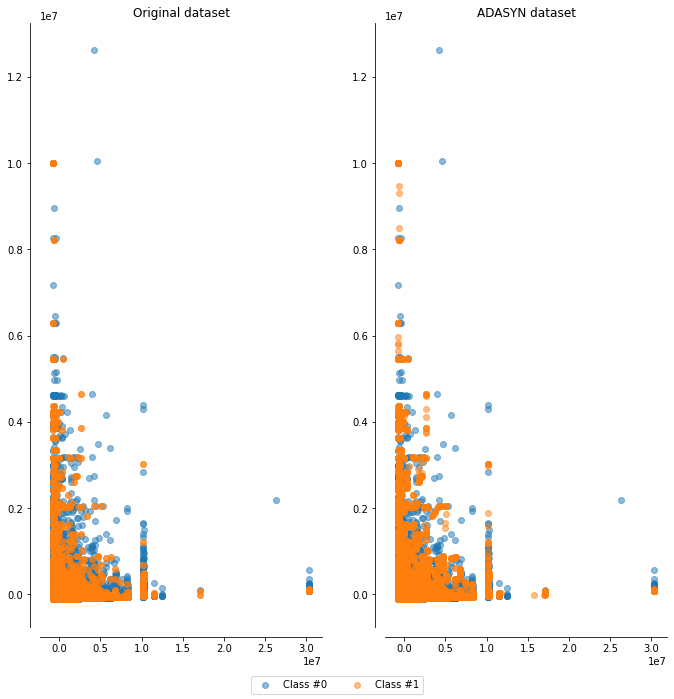

In [61]:
X_res_vis = pca.transform(X_res)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label='Class #0', alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label='Class #1', alpha=0.5)
ax1.set_title('Original dataset')


ax2.scatter(X_res_vis[y_res == 0, 0], X_res_vis[y_res == 0, 1], label='Class #0', alpha=0.5)
ax2.scatter(X_res_vis[y_res == 1, 0], X_res_vis[y_res == 1, 1], label='Class #1', alpha=0.5)
ax2.set_title('ADASYN dataset')

for ax in (ax1, ax2) :
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))


plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
             ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)    
plt.show()

reference
- http://glemaitre.github.io/imbalanced-learn/auto_examples/over-sampling/plot_adasyn.html
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html